In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from collections import defaultdict
import pickle
from torch.autograd import Variable
import torch.optim as optim
import sys
import data_transform
import model_funcs
%matplotlib inline

In [2]:
train_foldername = 'en-valid-10k'
train_filename = 'qa2_train.txt'
train_fname = './bAbI_Data/'+str(train_foldername)+'/'+str(train_filename)

valid_foldername = 'en-valid-10k'
valid_filename = 'qa2_valid.txt'
valid_fname = './bAbI_Data/'+str(valid_foldername)+'/'+str(valid_filename)

test_foldername = 'en-valid-10k'
test_filename = 'qa2_test.txt'
test_fname = './bAbI_Data/'+str(test_foldername)+'/'+str(test_filename)

unk_thres = 0
train_data_BOW, valid_data_BOW, test_data_BOW, vocab = data_transform.get_data(train_fname, valid_fname, test_fname, unk_thres = unk_thres)
print(train_data_BOW.shape)
print(valid_data_BOW.shape)
print(test_data_BOW.shape)
print(len(vocab))

Train Data Size :  48414
Valid Data Size :  5578
Test Data Size :  5398
(48414, 34)
(5578, 34)
(5398, 34)
33


0 Training Loss :  1.2174735069274902  , Training Acc :  22.066666666666666
0 Validation Loss :  1.8091540336608887  , Validation Acc :  15.2
1 Training Loss :  1.4580705165863037  , Training Acc :  24.244444444444444
1 Validation Loss :  1.7507529258728027  , Validation Acc :  22.400000000000002
2 Training Loss :  1.4267339706420898  , Training Acc :  23.655555555555555
2 Validation Loss :  1.6120460033416748  , Validation Acc :  19.2
3 Training Loss :  2.96101713180542  , Training Acc :  24.544444444444444
3 Validation Loss :  1.8445621728897095  , Validation Acc :  17.8
4 Training Loss :  0.7157449126243591  , Training Acc :  25.288888888888888
4 Validation Loss :  1.4383901357650757  , Validation Acc :  18.6
5 Training Loss :  1.6134593486785889  , Training Acc :  24.666666666666668
5 Validation Loss :  4.943549633026123  , Validation Acc :  8.200000000000001
6 Training Loss :  1.582436442375183  , Training Acc :  23.3
6 Validation Loss :  1.7088584899902344  , Validation Acc :  19

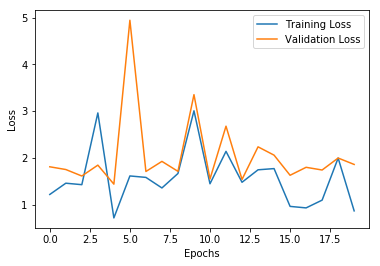

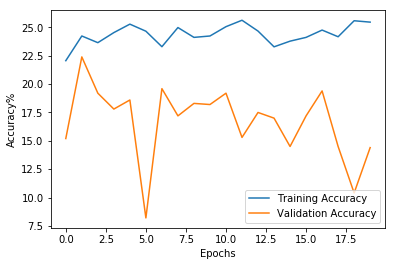

In [3]:
embedding_dim = 30
vocab_size = len(vocab)
num_hops = 3
max_mem_size = 30
epochs = 20
eta = 0.005
LS = -1
ls_thres = 0.5
temporal = False

model = model_funcs.QuesAnsModel(embedding_dim, vocab_size, num_hops = num_hops, max_mem_size = max_mem_size, temporal=temporal)
l_tr, accuracy_tr, l_vd, accuracy_vd = model_funcs.train(model, train_data_BOW, valid_data_BOW,
                                                         epochs=epochs,eta=eta,opt=optim.Adam,LS=LS,ls_thres=ls_thres)

In [ ]:
acc = model_funcs.test(model,test_data_BOW)